# Problem: Predictive Modeling of Income Levels based on Demographic and Employment Features




In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore')

# Data Preprocessing and Cleaning

In [2]:

df = pd.read_csv('data_income_proj.csv')

In [3]:
# Preview of Dataset with different rows
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Check Data summary 


In [4]:
#  Summary of rows, coloums and number of Categorcal and Numerical Variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3    Education        32561 non-null  object
 4    Education-num    32561 non-null  int64 
 5    marital-status   32561 non-null  object
 6    occupation       32561 non-null  object
 7    relationship     32561 non-null  object
 8    race             32561 non-null  object
 9   Gender            32561 non-null  object
 10   capital-gain     32561 non-null  int64 
 11   capital-loss     32561 non-null  int64 
 12   hours-per-week   32561 non-null  int64 
 13   country          32561 non-null  object
 14   income           32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
##### As data info contains all 32561 counts for each variable 
#thus there is no null or NaN values present in the dataset

# Cheking for duplicates and drop duplicate coloumns if any
df.duplicated().any()
# df[df.duplicated(keep=False)].value_counts()

True

In [6]:
df.drop_duplicates(inplace=True)


###### Rows and coloumns after removing duplicate dataset


In [7]:
df.shape

(32537, 15)

###### Different feature variables available in the dataset


In [8]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income'],
      dtype='object')

In [9]:
# Columns contains blank places thus We rename the coloumns for convinience


df.columns=['age','profession_class', 'final_census', 'education', 'education_num', 'marital-status',
            'occupation', 'relationship', 'race', 'gender', 'capital_gain', 'capital_loss', 'hours_per_week',
            'country', 'income']
    
    
   

In [10]:
# remove training and leading whitespace from the data
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)

In [11]:
df.describe()

,age,final_census,education_num,capital_gain,capital_loss,hours_per_week
count,32537.000000,3.253700e+04,32537.000000,32537.000000,32537.000000,32537.000000
mean,38.585549,1.897808e+05,10.081815,1078.443741,87.368227,40.440329
std,13.637984,1.055565e+05,2.571633,7387.957424,403.101833,12.346889
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369930e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [12]:
# Few Columns contains question marks for example: 'Profession Class',  'occupation', 'country'
# and capital gain and capital loss has few variable as zero 

print(df['profession_class'].unique())
print(df['profession_class'].value_counts())


['State-gov' 'Self-emp-not-inc' 'Private' 'Federal-gov' 'Local-gov' '?'
 'Self-emp-inc' 'Without-pay' 'Never-worked']
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: profession_class, dtype: int64


In [13]:
print(df['occupation'].unique())
print(df['occupation'].value_counts())

['Adm-clerical' 'Exec-managerial' 'Handlers-cleaners' 'Prof-specialty'
 'Other-service' 'Sales' 'Craft-repair' 'Transport-moving'
 'Farming-fishing' 'Machine-op-inspct' 'Tech-support' '?'
 'Protective-serv' 'Armed-Forces' 'Priv-house-serv']
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
?                    1843
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: occupation, dtype: int64


In [14]:
print(df['country'].unique())
print(len(df['country'].unique()))
print(df['country'].value_counts())

['United-States' 'Cuba' 'Jamaica' 'India' '?' 'Mexico' 'South'
 'Puerto-Rico' 'Honduras' 'England' 'Canada' 'Germany' 'Iran'
 'Philippines' 'Italy' 'Poland' 'Columbia' 'Cambodia' 'Thailand' 'Ecuador'
 'Laos' 'Taiwan' 'Haiti' 'Portugal' 'Dominican-Republic' 'El-Salvador'
 'France' 'Guatemala' 'China' 'Japan' 'Yugoslavia' 'Peru'
 'Outlying-US(Guam-USVI-etc)' 'Scotland' 'Trinadad&Tobago' 'Greece'
 'Nicaragua' 'Vietnam' 'Hong' 'Ireland' 'Hungary' 'Holand-Netherlands']
42
United-States                 29153
Mexico                          639
?                               582
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                   

#### Cheking for missing and Null Values

In [15]:
# First we check any missing or null  values in the dataframe
# df.isnull() displays boolean values if any value is missing or not
df.isnull().values.any()

False

In [16]:
# To check if any cloumns has missing values 
df.isnull().sum()

age                 0
profession_class    0
final_census        0
education           0
education_num       0
marital-status      0
occupation          0
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
country             0
income              0
dtype: int64

In [17]:
# since the ? is almost similar numbers in professionclass and occupation, 
# so we will check first that how they are related to each other 
df[df['profession_class']=='?'].occupation.value_counts()

?    1836
Name: occupation, dtype: int64

In [18]:
df[df['occupation']=='?'].profession_class.value_counts()

?               1836
Never-worked       7
Name: profession_class, dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32537 non-null  int64 
 1   profession_class  32537 non-null  object
 2   final_census      32537 non-null  int64 
 3   education         32537 non-null  object
 4   education_num     32537 non-null  int64 
 5   marital-status    32537 non-null  object
 6   occupation        32537 non-null  object
 7   relationship      32537 non-null  object
 8   race              32537 non-null  object
 9   gender            32537 non-null  object
 10  capital_gain      32537 non-null  int64 
 11  capital_loss      32537 non-null  int64 
 12  hours_per_week    32537 non-null  int64 
 13  country           32537 non-null  object
 14  income            32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [20]:
df[df['occupation']=='?'].country.value_counts()

United-States         1666
Mexico                  33
?                       27
Canada                  14
Philippines             10
South                    9
Germany                  9
Taiwan                   9
China                    7
El-Salvador              6
Italy                    5
Puerto-Rico              5
Poland                   4
England                  4
Portugal                 3
Columbia                 3
Vietnam                  3
Dominican-Republic       3
Japan                    3
Cuba                     3
Haiti                    2
France                   2
Ecuador                  1
Peru                     1
Cambodia                 1
Thailand                 1
Honduras                 1
Laos                     1
Hong                     1
Guatemala                1
Trinadad&Tobago          1
Iran                     1
Nicaragua                1
Jamaica                  1
Scotland                 1
Name: country, dtype: int64

In [21]:
# Save a copy of dataframe in updated dataframe 
updated_df=df

In [22]:
updated_df.shape

(32537, 15)

In [23]:
df.replace('?', np.nan, inplace=True)

In [24]:
df[df['occupation']=='?'].profession_class.value_counts()

Series([], Name: profession_class, dtype: int64)

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32537 non-null  int64 
 1   profession_class  30701 non-null  object
 2   final_census      32537 non-null  int64 
 3   education         32537 non-null  object
 4   education_num     32537 non-null  int64 
 5   marital-status    32537 non-null  object
 6   occupation        30694 non-null  object
 7   relationship      32537 non-null  object
 8   race              32537 non-null  object
 9   gender            32537 non-null  object
 10  capital_gain      32537 non-null  int64 
 11  capital_loss      32537 non-null  int64 
 12  hours_per_week    32537 non-null  int64 
 13  country           31955 non-null  object
 14  income            32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [26]:
df.isnull().sum()

age                    0
profession_class    1836
final_census           0
education              0
education_num          0
marital-status         0
occupation          1843
relationship           0
race                   0
gender                 0
capital_gain           0
capital_loss           0
hours_per_week         0
country              582
income                 0
dtype: int64

In [27]:
# based on above data it indicates that there whenever occupation is ?, profession class is always 
# question marks, and equivalent few of the country columns are also question marks
# Being categorical variable we will replce ? with mode value of the column
#  also to test to possiblity of handling missing values with different ways, we consider following ways
# 1. replace with mode
# 2. dropout those particular number of rows almost 1843 occupation whenever ? the profession class 
# 1836 are ?, and 583 countrys ?, in 27 cases all three coloumns are ?

# impute Graduated and Family_Size features with most_frequent values
replace_method= 0
if replace_method==0:
    from sklearn.impute import SimpleImputer
    impute_mode = SimpleImputer(strategy = 'most_frequent')
    impute_mode.fit(df[['profession_class', 'occupation', 'country']])
    df[['profession_class', 'occupation', 'country']] = impute_mode.transform(df[['profession_class', 'occupation', 'country']])
elif replace_method==1:
     df = df.dropna(axis=0)

In [28]:
df.isnull().sum()

age                 0
profession_class    0
final_census        0
education           0
education_num       0
marital-status      0
occupation          0
relationship        0
race                0
gender              0
capital_gain        0
capital_loss        0
hours_per_week      0
country             0
income              0
dtype: int64

In [29]:
print(df.income.value_counts())
print(df.income.unique())

<=50K    24698
>50K      7839
Name: income, dtype: int64
['<=50K' '>50K']


In [30]:
df.income.replace({'<=50K': 0, '>50K': 1}, inplace=True)

In [31]:
print(df.income.value_counts())
print(df.income.unique())

0    24698
1     7839
Name: income, dtype: int64
[0 1]


## Exploratory Data Analysis (EDA)

In [32]:
# This indicates target column has imbalance data set, 
# we find percentage of distribution of these income groups
print(df.income.value_counts()/df.income.value_counts().sum()*100)

0    75.907428
1    24.092572
Name: income, dtype: float64


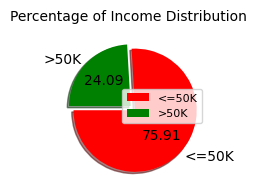

In [33]:
#Next we evaulate reservation status with how many bookings were confirmed and how many are canceled

plt.figure(figsize= (5,2))
plt.pie(df['income'].value_counts(),
                    autopct = '%.2f',
                    explode = [0.1,0],
                    labels = ['<=50K', '>50K'],
                    shadow = True, 
                    textprops = {'fontsize':10},
                    colors = ['red', 'green'],
                    startangle = 180
)
plt.title('Percentage of Income Distribution ', fontsize = 10)
plt.legend(fontsize = 8, loc = 'right')
plt.show()

In [34]:
df.corr().style.background_gradient(cmap='coolwarm')


,age,final_census,education_num,capital_gain,capital_loss,hours_per_week,income
age,1.000000,-0.076447,0.036224,0.077676,0.057745,0.068515,0.234037
final_census,-0.076447,1.000000,-0.043388,0.000429,-0.010260,-0.018898,-0.009502
education_num,0.036224,-0.043388,1.000000,0.122664,0.079892,0.148422,0.335272
capital_gain,0.077676,0.000429,0.122664,1.000000,-0.031639,0.078408,0.223336
capital_loss,0.057745,-0.010260,0.079892,-0.031639,1.000000,0.054229,0.150501
hours_per_week,0.068515,-0.018898,0.148422,0.078408,0.054229,1.000000,0.229658
income,0.234037,-0.009502,0.335272,0.223336,0.150501,0.229658,1.000000


In [35]:
### EDA
# Since Capital gain and Capital Loss represents Net capital gain so we combine these two column into one cloumn
# we will find distribution of dataset how different features of dataset are related to income  cat_features = df[[ 'Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area' ]] --> --> -->

In [36]:
df['net_captial'] = df['capital_gain']-df['capital_loss']

In [37]:
df.drop(['capital_gain','capital_loss'], axis=1, inplace=True)
df.shape

(32537, 14)

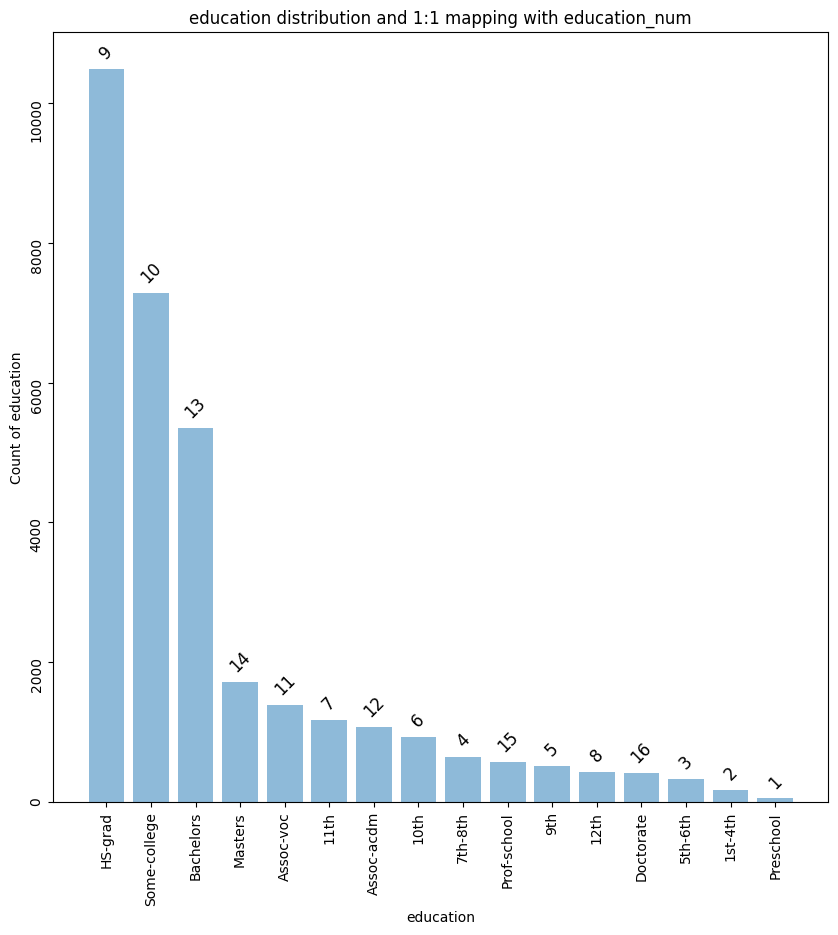

In [38]:
# chart= sns.displot(df, x="education", hue="education_num", shrink=.8)
# chart.set_xticklabels(labels=df.education.unique(),rotation=90)
# plt.show()
def edu_graph(df):
    x1=df.education.value_counts().index
    y1=df.education.value_counts().values
    y2=[]
    for k in x1:
        y2.append(df[df['education']==k].education_num.unique()[0])
    fig, ax = plt.subplots(figsize=(10,10))
    plt.bar(x1, y1,alpha=0.5)
    for i in range(len(x1)):
        plt.text(i,y1[i]+150,y2[i],fontsize=12,ha='center',rotation=45)
    ax.tick_params(labelrotation=90)
    ax.set_xlabel('education')
    ax.set_ylabel('Count of education')
    ax.set_title('education distribution and 1:1 mapping with education_num')
    fig.savefig('education.png')
    plt.show()
    
edu_graph(df)

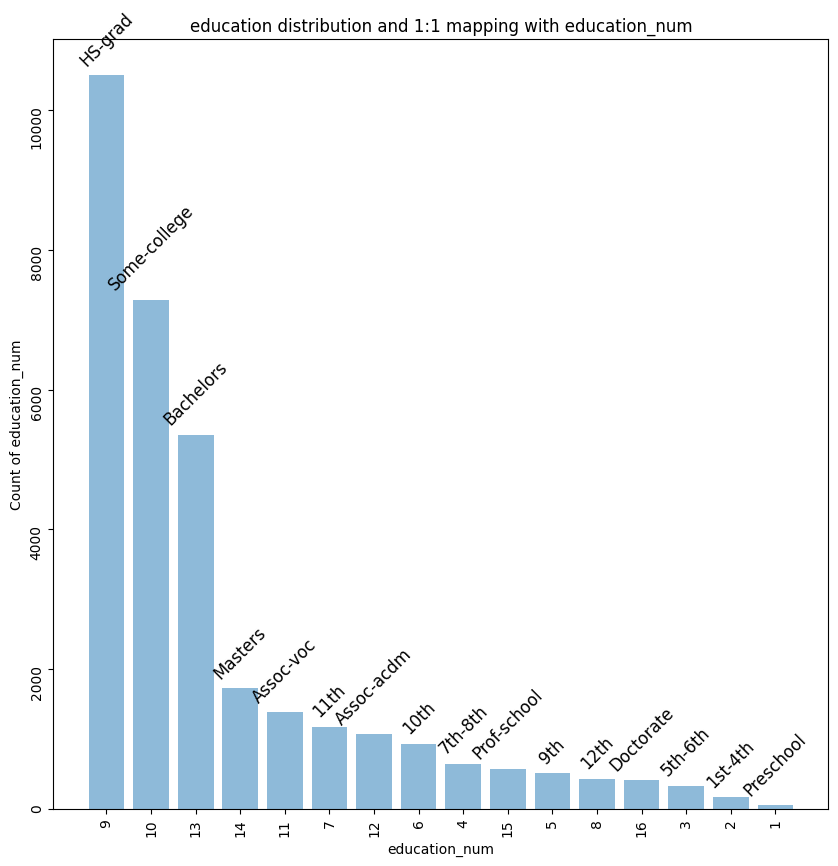

In [39]:
def edunum_graph(df):
    x1=df.education_num.value_counts().index
    y1=df.education_num.value_counts().values
    y2=[]
    for k in x1:
        y2.append(df[df['education_num']==k].education.unique()[0])
    fig, ax = plt.subplots(figsize=(10,10))
    x1=[str(x) for x in x1]
    plt.bar(x1, y1,alpha=0.5)
    for i in range(len(x1)):
        plt.text(i,y1[i]+150,y2[i],fontsize=12,ha='center',rotation=45)
    ax.tick_params(labelrotation=90)
    ax.set_xlabel('education_num')
    ax.set_ylabel('Count of education_num')
    ax.set_title('education distribution and 1:1 mapping with education_num')
    fig.savefig('education_num.png')
    plt.show()
    
edunum_graph(df)

In [40]:
# Education and Education_num seems to have one to one mapping
for k in df.education.unique():
    print(f"eductaion {k} has unique values of equivalent education number: {df[df.education==k].education_num.unique()}")

eductaion Bachelors has unique values of equivalent education number: [13]
eductaion HS-grad has unique values of equivalent education number: [9]
eductaion 11th has unique values of equivalent education number: [7]
eductaion Masters has unique values of equivalent education number: [14]
eductaion 9th has unique values of equivalent education number: [5]
eductaion Some-college has unique values of equivalent education number: [10]
eductaion Assoc-acdm has unique values of equivalent education number: [12]
eductaion Assoc-voc has unique values of equivalent education number: [11]
eductaion 7th-8th has unique values of equivalent education number: [4]
eductaion Doctorate has unique values of equivalent education number: [16]
eductaion Prof-school has unique values of equivalent education number: [15]
eductaion 5th-6th has unique values of equivalent education number: [3]
eductaion 10th has unique values of equivalent education number: [6]
eductaion 1st-4th has unique values of equivalent

In [41]:
# Since education is a categosical variable which has equivalent numerical representation as 
# education_num, thus we drop education
df.drop(['education'], axis=1, inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32537 entries, 0 to 32560
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   age               32537 non-null  int64 
 1   profession_class  32537 non-null  object
 2   final_census      32537 non-null  int64 
 3   education_num     32537 non-null  int64 
 4   marital-status    32537 non-null  object
 5   occupation        32537 non-null  object
 6   relationship      32537 non-null  object
 7   race              32537 non-null  object
 8   gender            32537 non-null  object
 9   hours_per_week    32537 non-null  int64 
 10  country           32537 non-null  object
 11  income            32537 non-null  int64 
 12  net_captial       32537 non-null  int64 
dtypes: int64(6), object(7)
memory usage: 3.5+ MB


## Univariate Analysis  of Features

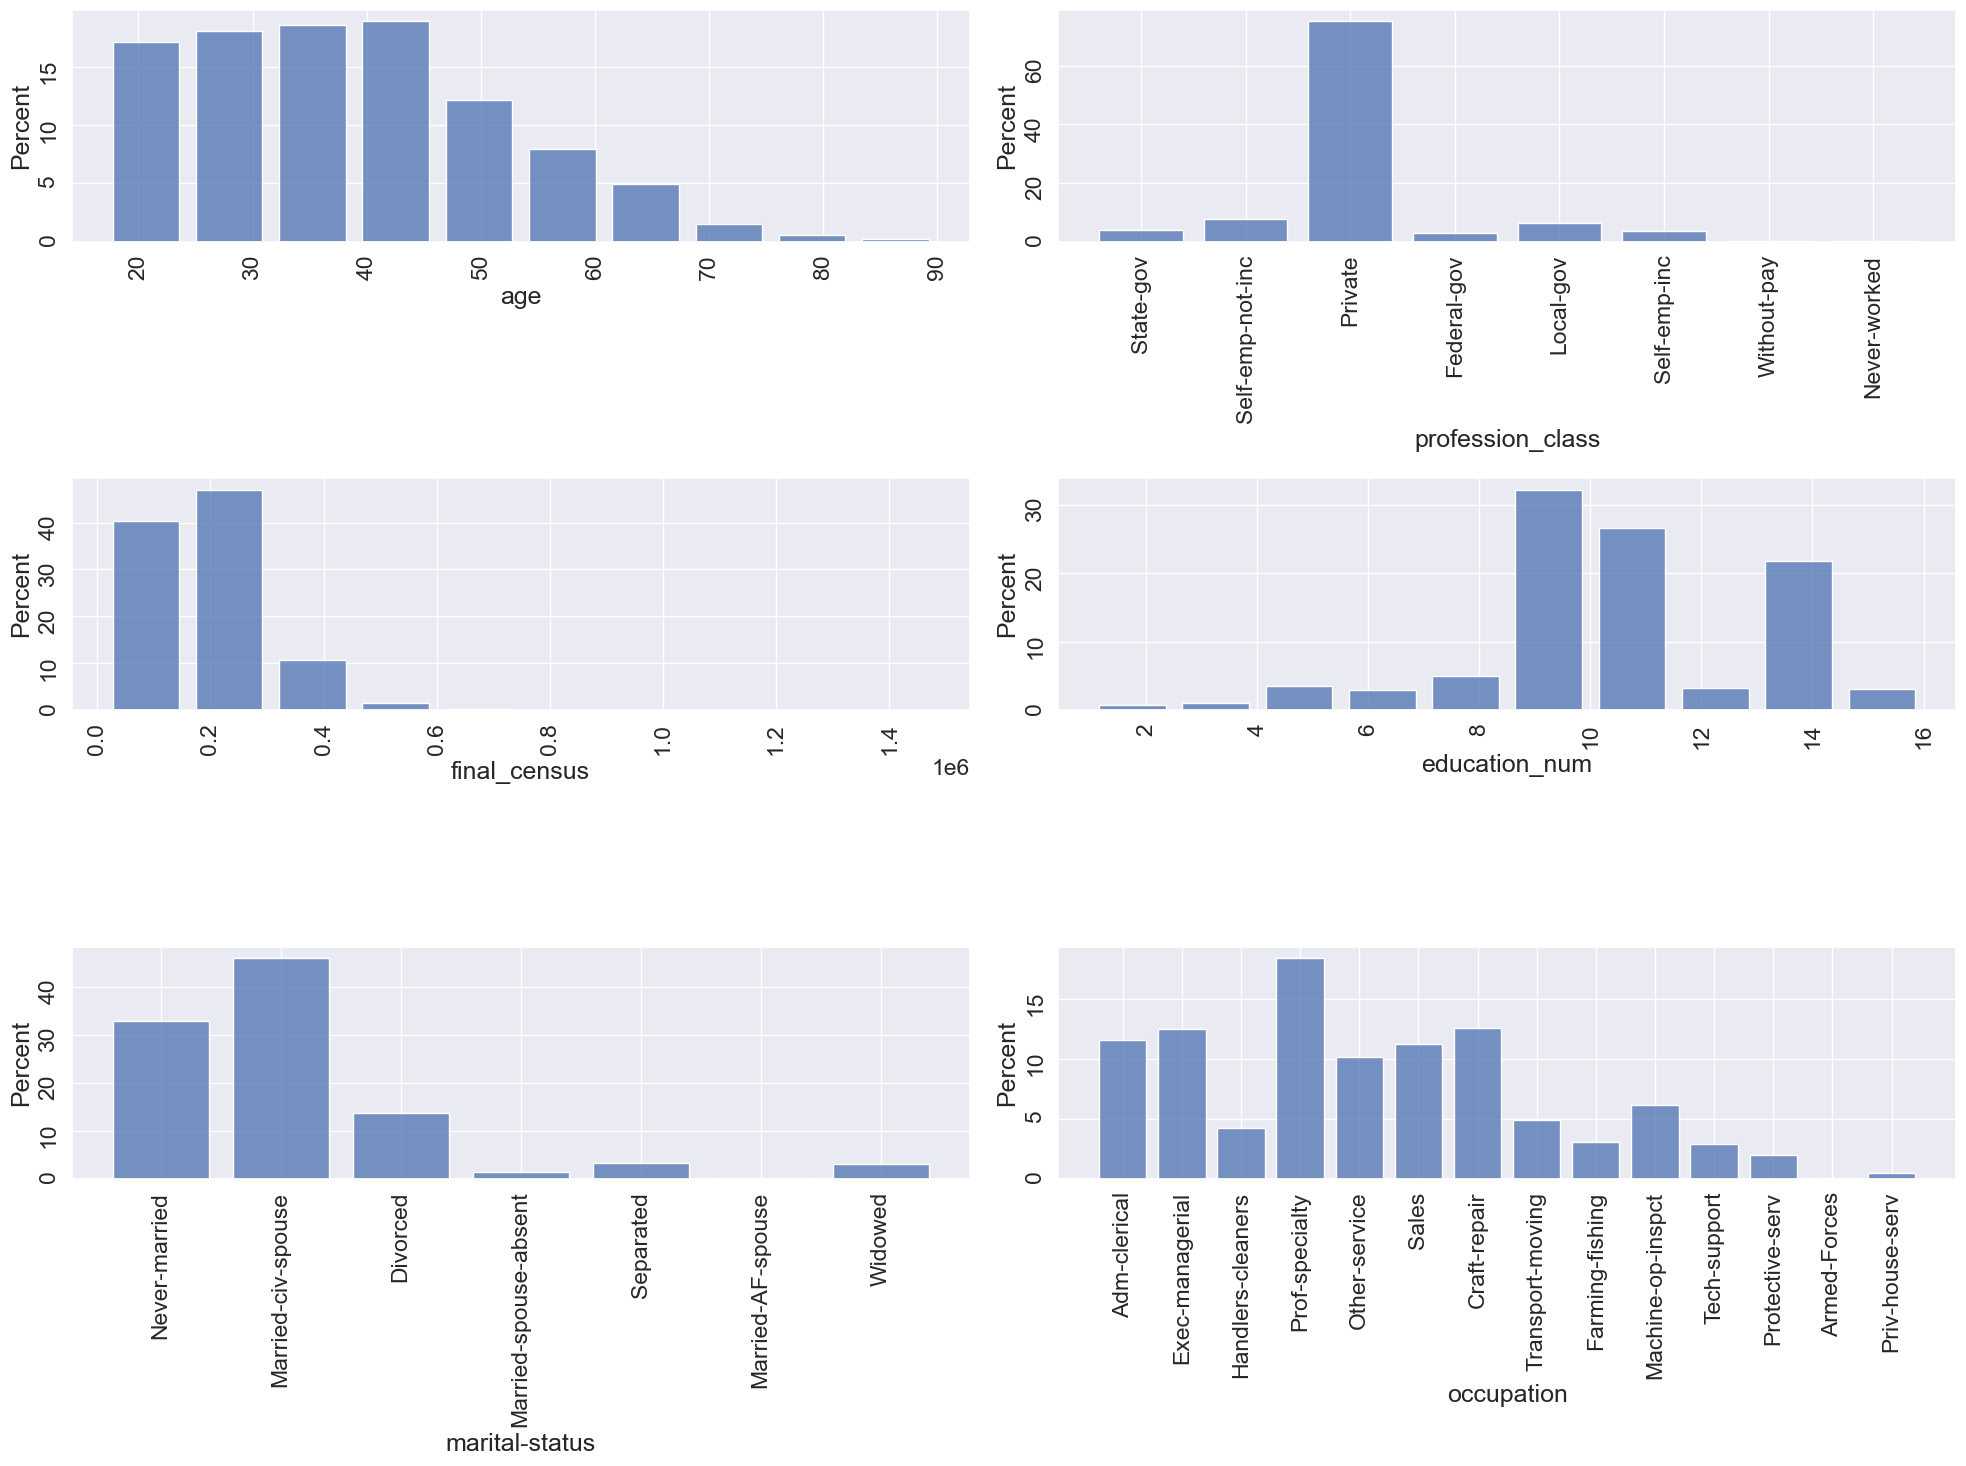

In [43]:
import itertools
sns.set(font_scale=1.5)
fig, axes= plt.subplots(3,2, figsize=(20,15))
sns.histplot(ax=axes[0,0],stat='percent',data=df,x='age',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[0,1],stat='percent',data=df,x='profession_class',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[1,0],stat='percent',data=df,x='final_census',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[1,1],stat='percent',data=df,x='education_num',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[2,0],stat='percent',data=df,x='marital-status',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[2,1],stat='percent',data=df,x='occupation',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
for i, j in itertools.product(range(3), range(2)):
    axes[i,j].tick_params(labelrotation=90)
fig.tight_layout()
fig.savefig('fig2.png')
plt.show()

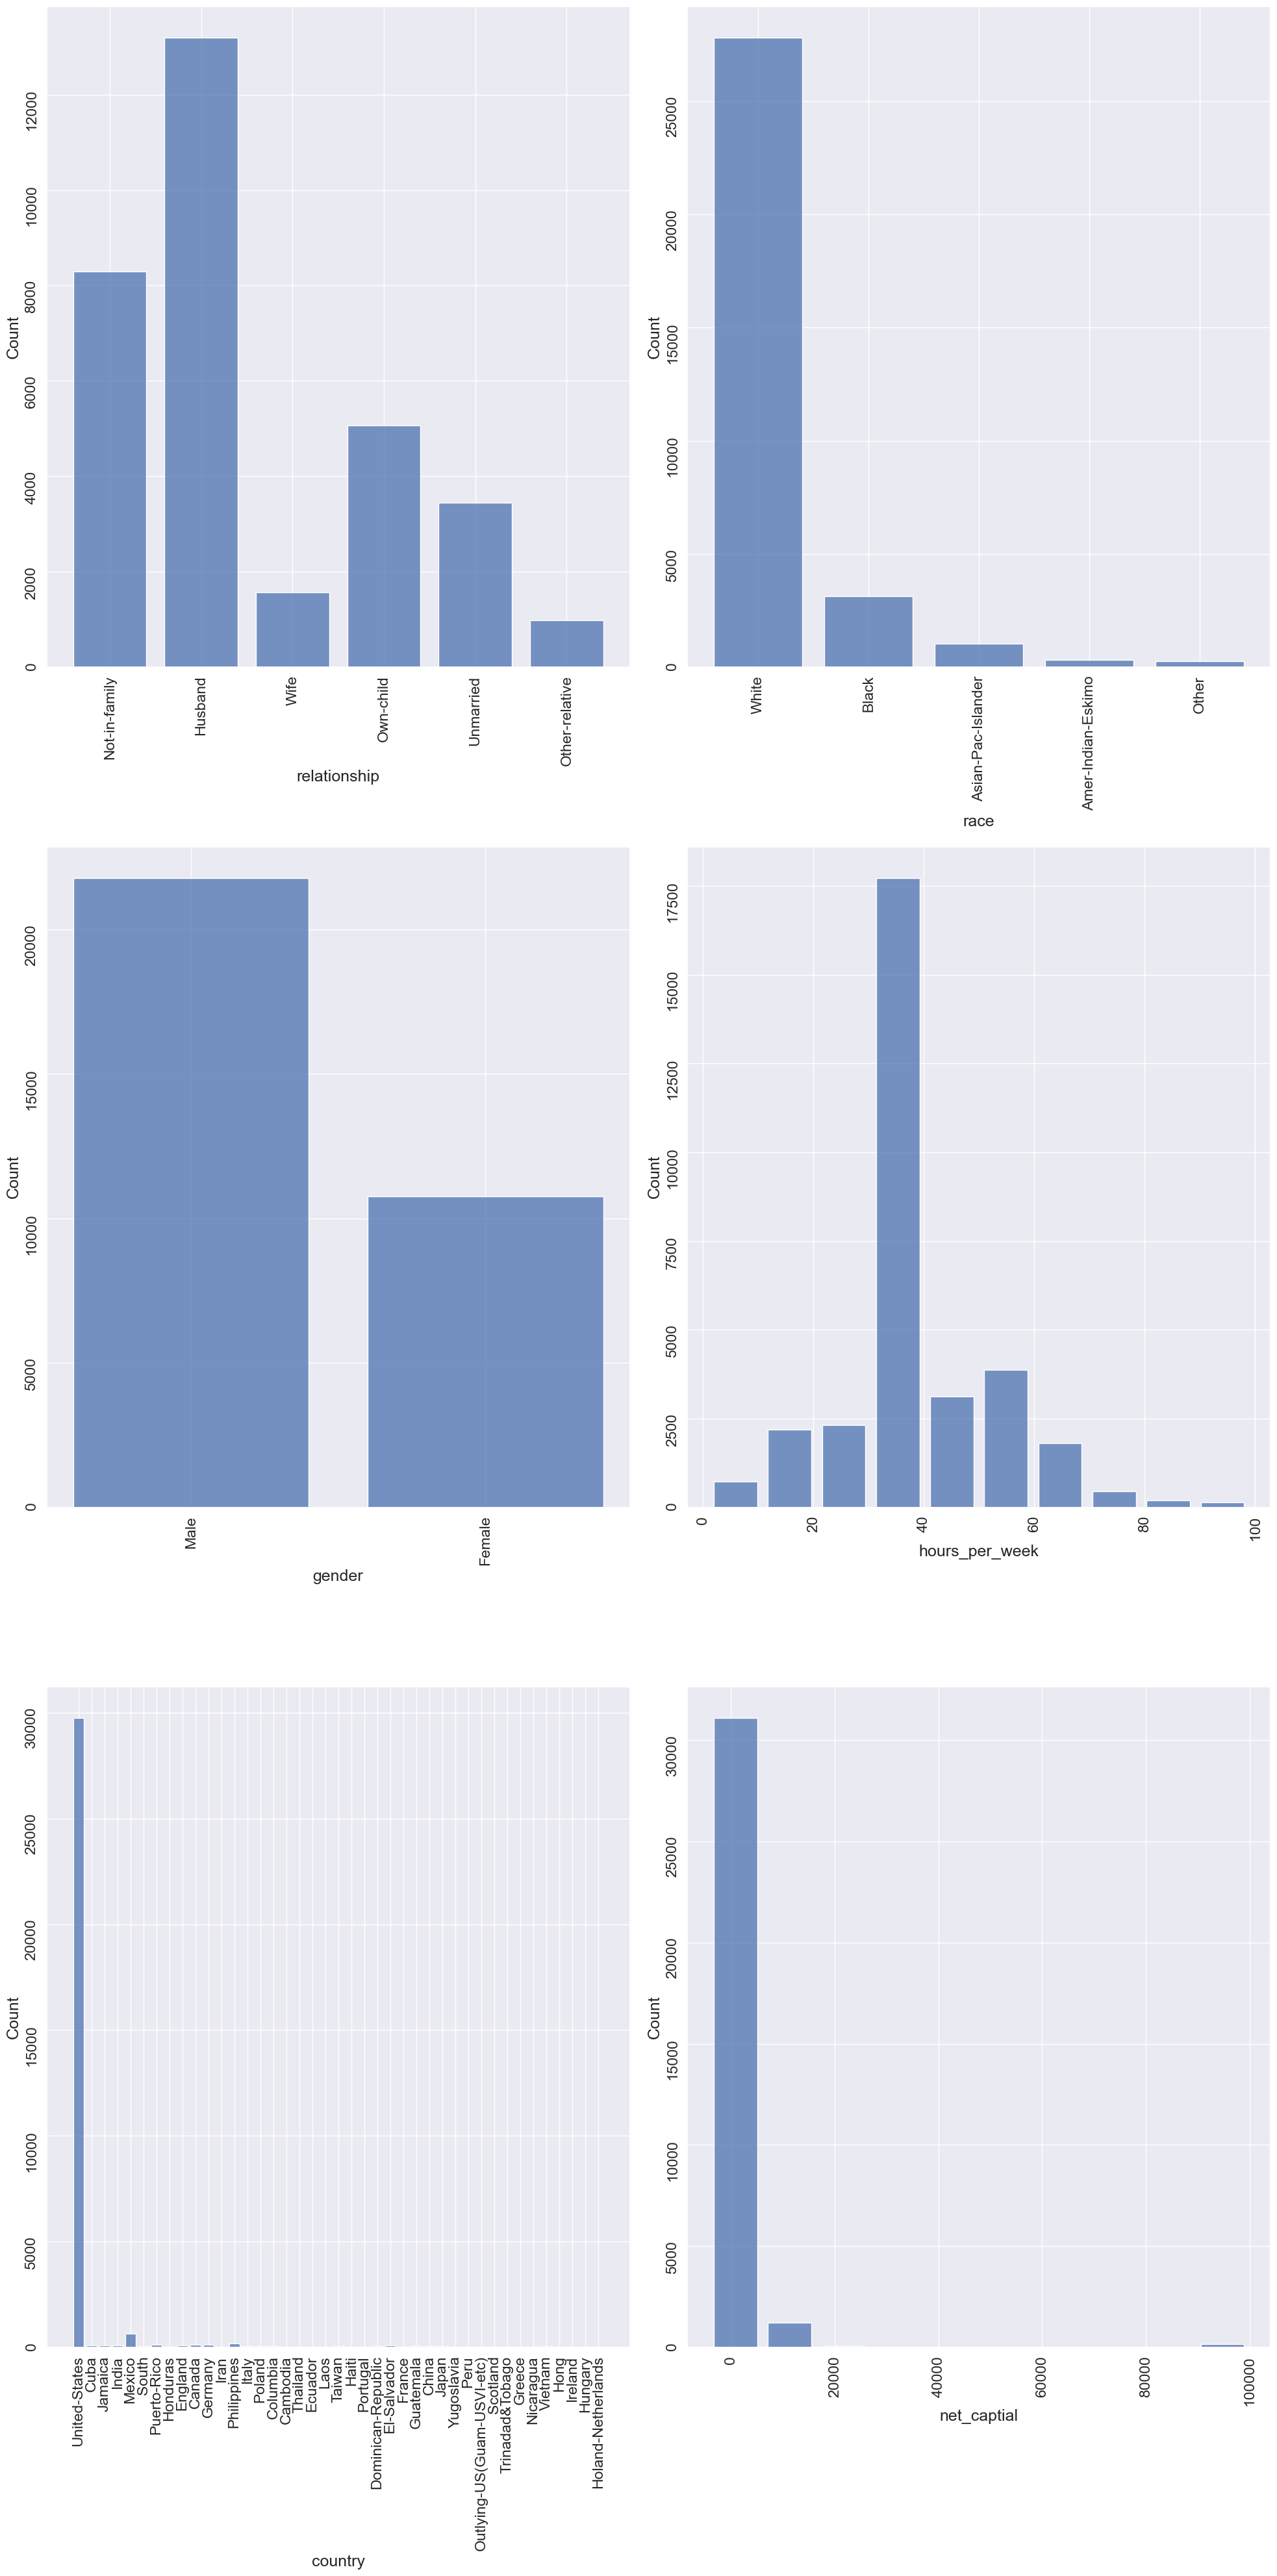

In [44]:
import itertools
sns.set(font_scale=1.5)
fig, axes= plt.subplots(3,2, figsize=(20,40))
sns.histplot(ax=axes[0,0], data=df,x='relationship',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[0,1], data=df,x='race',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[1,0], data=df,x='gender',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[1,1], data=df,x='hours_per_week',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[2,0], data=df,x='country',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
sns.histplot(ax=axes[2,1], data=df,x='net_captial',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8)
for i, j in itertools.product(range(3), range(2)):
    axes[i,j].tick_params(labelrotation=90)
fig.tight_layout()
fig.savefig('fig3.png')
plt.show()

## Analysis of Features distribution with respect to Income target variable

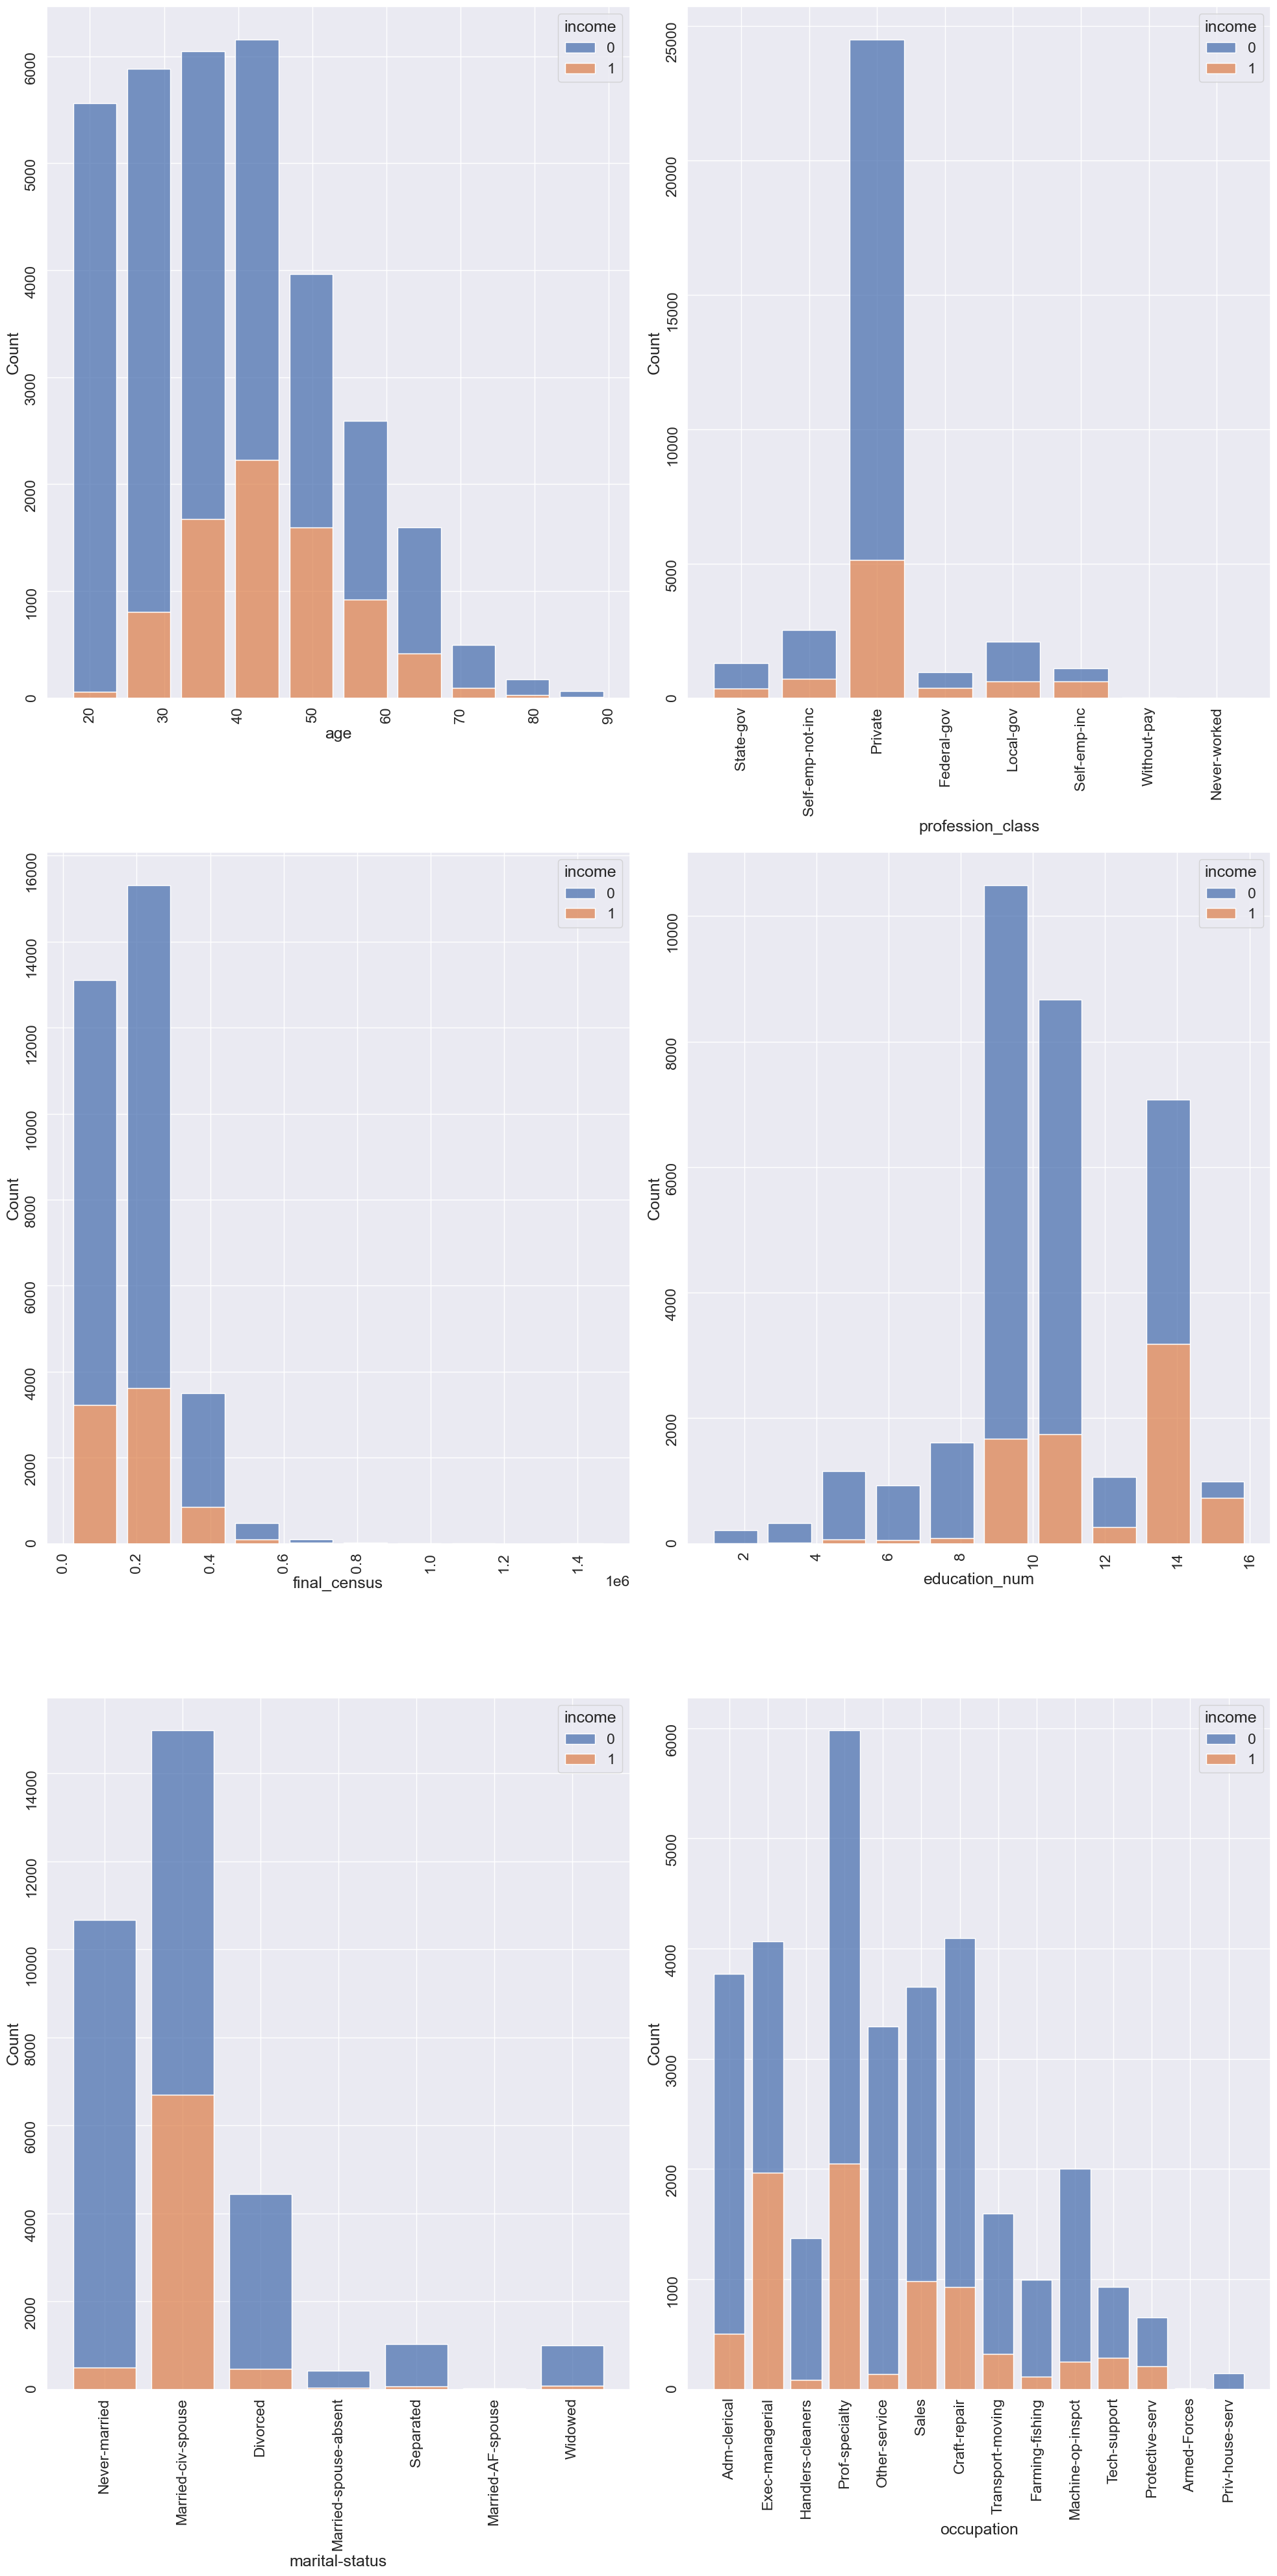

In [45]:
import itertools
sns.set(font_scale=1.5)
fig, axes= plt.subplots(3,2, figsize=(20,40))
sns.histplot(ax=axes[0,0], data=df,x='age',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[0,1], data=df,x='profession_class',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[1,0], data=df,x='final_census',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[1,1], data=df,x='education_num',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[2,0], data=df,x='marital-status',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[2,1], data=df,x='occupation',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
for i, j in itertools.product(range(3), range(2)):
    axes[i,j].tick_params(labelrotation=90)
fig.tight_layout()
fig.savefig('fig4.png')
plt.show()

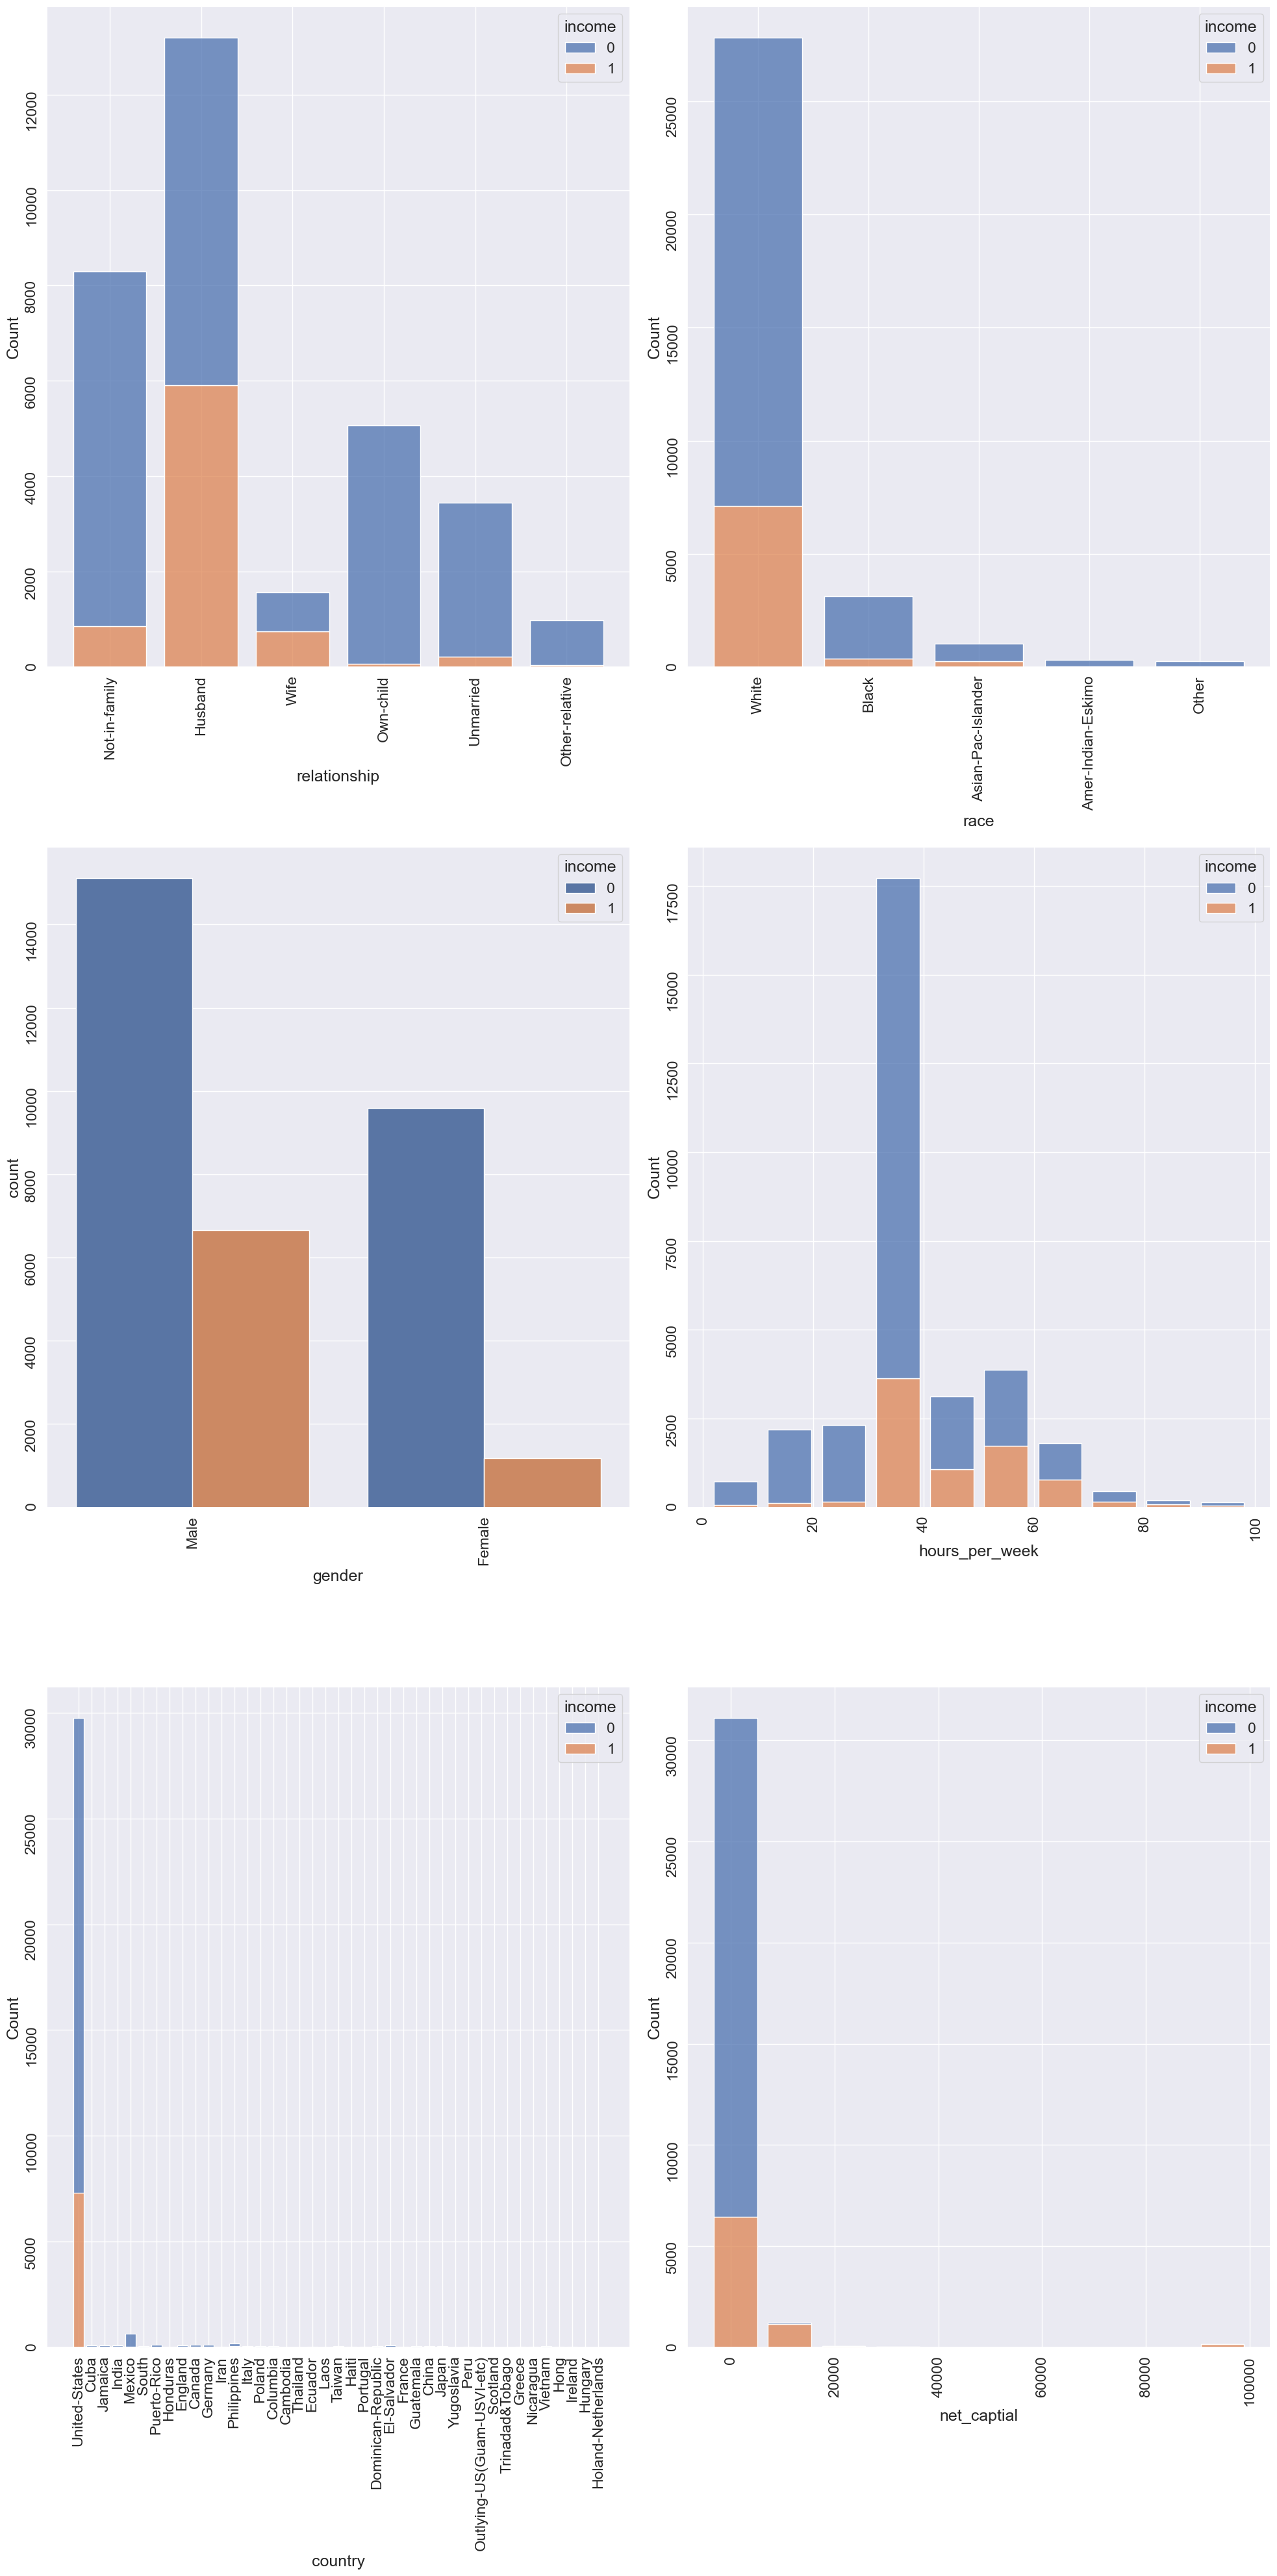

In [46]:
import itertools
sns.set(font_scale=1.5)
fig, axes= plt.subplots(3,2, figsize=(20,40))
sns.histplot(ax=axes[0,0], data=df,x='relationship',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[0,1], data=df,x='race',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.countplot(ax=axes[1,0], data=df,x='gender',fill=True,hue_order=[0,1],hue='income')
sns.histplot(ax=axes[1,1], data=df,x='hours_per_week',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[2,0], data=df,x='country',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
sns.histplot(ax=axes[2,1], data=df,x='net_captial',bins=10,fill=True,hue_order=[0,1],multiple="stack", shrink=0.8,hue='income')
for i, j in itertools.product(range(3), range(2)):
    axes[i,j].tick_params(labelrotation=90)
fig.tight_layout()
fig.savefig('fig5.png')
plt.show()

In [47]:
def boxplots(df,numerical_columns):
    sns.set(font_scale=2)
    sns.set_style("darkgrid")
    plt.figure(figsize=(40,10))
    print(f"{numerical_columns=}")
    for i,col in enumerate(numerical_columns):
        plt.subplot(1,len(numerical_columns),i+1)
        sns.boxplot(df,x=df['income'],y=df[col])
    plt.title(f"Boxplot of {numerical_columns}")
    plt.show()
def dropOutliers(df,numerical_columns):
    for cname in numerical_columns:
        iqr = 1.5 * ( np.percentile(df[cname],75) - np.percentile(df[cname],25))
        df.drop(df[df[cname] > (iqr + np.percentile(df[cname],75))].index,inplace=True)
        df.drop(df[df[cname] < (np.percentile(df[cname],25) - iqr)].index,inplace=True)
    return df

## Outliers Checking through Boxplot

numerical_columns=['age', 'final_census', 'education_num', 'hours_per_week', 'income', 'net_captial'] - removing 'income' and 'gender' as they are having only 2 values of 0 and 1
boxplot before removing Outliers
numerical_columns=['age', 'final_census', 'education_num', 'hours_per_week', 'net_captial']


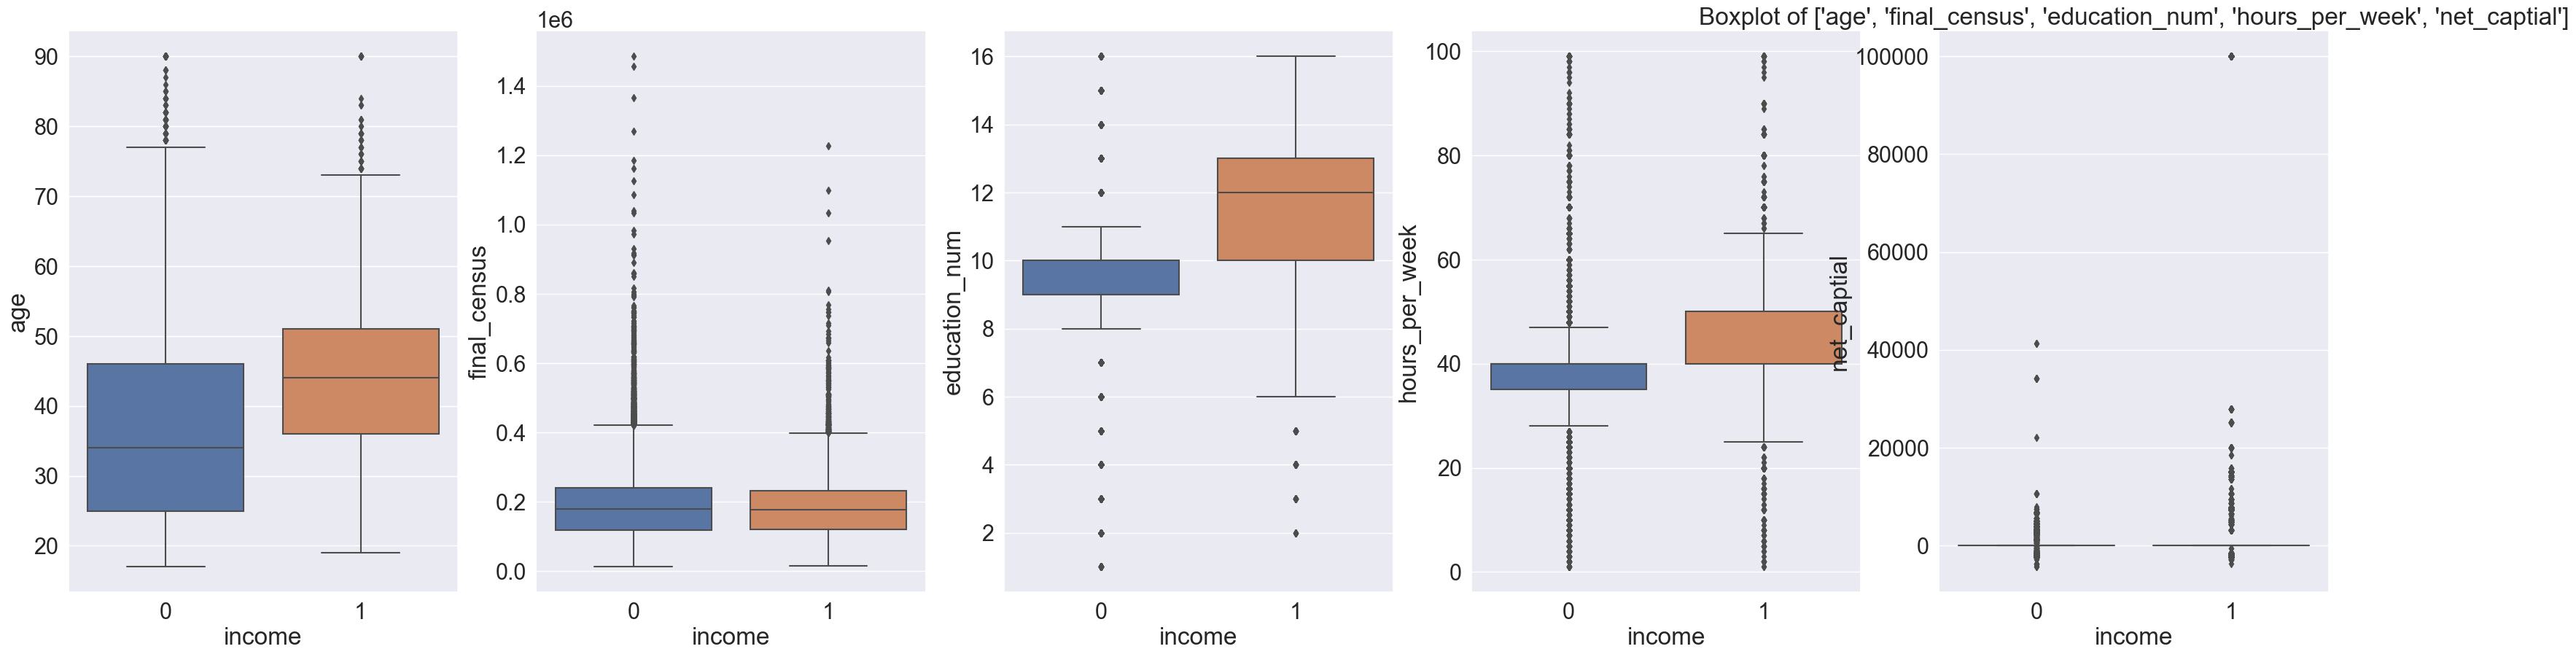

boxplot after removing Outliers
numerical_columns=['age', 'final_census', 'education_num', 'hours_per_week', 'net_captial']


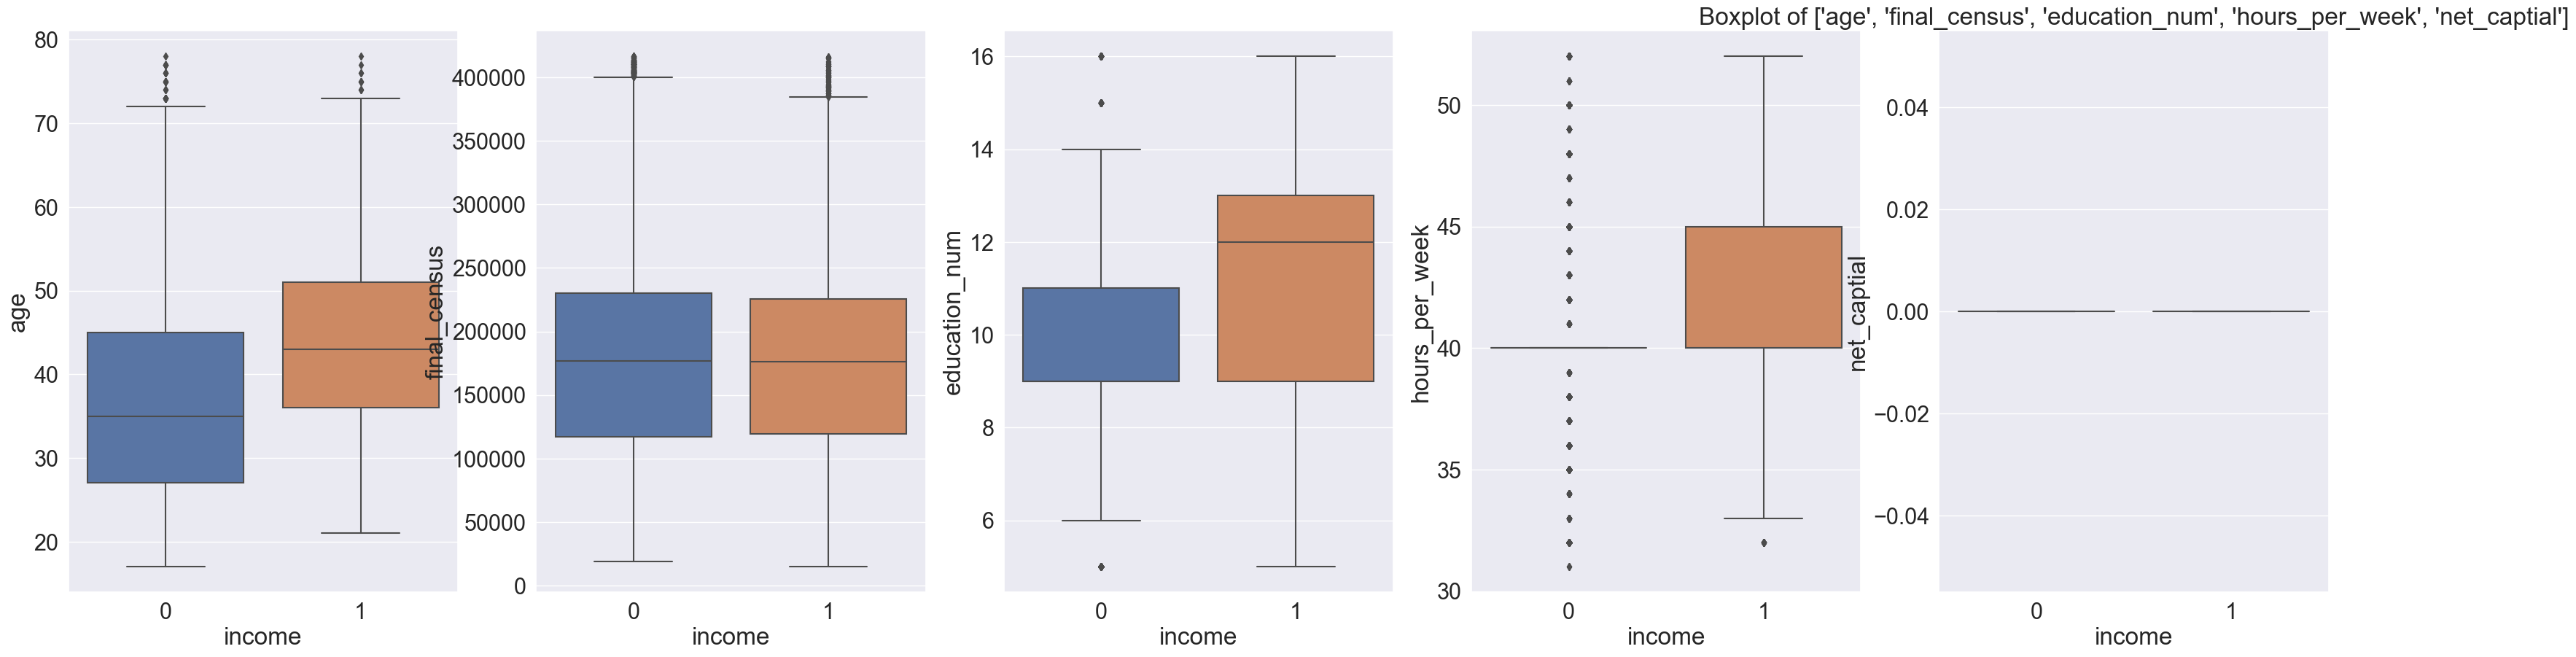

In [48]:
numerical_columns = list(df.select_dtypes(include=['int']).columns)
print(f"{numerical_columns=} - removing 'income' and 'gender' as they are having only 2 values of 0 and 1")
# numerical_columns.remove('gender')
numerical_columns.remove('income')
print(f"boxplot before removing Outliers")
boxplots(df,numerical_columns)
print(f"boxplot after removing Outliers")
df=dropOutliers(df,numerical_columns)
boxplots(df,numerical_columns)

In [49]:
# Now we convert categorical variables to numerical columns using one hot encoding
# since country column contains too many categagorical values thus to reduce number of variables we consider first 
# first 20 countries of higher frequency only.

top_nc=[x for x in df.country.value_counts().sort_values(ascending=False).head(15).index]
for label in top_nc: df[label]=np.where(df.country == label,1,0)
df[['country']+ top_nc]

,country,United-States,Mexico,Philippines,Germany,Canada,Puerto-Rico,Jamaica,India,Cuba,England,China,Poland,El-Salvador,Vietnam,Dominican-Republic
2,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Cuba,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
5,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32554,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32555,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32556,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
32557,United-States,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [50]:
# now we drop country categorical column and apply get dummies for rest of the categorical cloumns
df.drop(['country'], axis=1, inplace=True)

## One Hot Encoding

In [51]:
df = pd.get_dummies(df, columns=['profession_class'])


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 2 to 32558
Data columns (total 34 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   age                                19214 non-null  int64 
 1   final_census                       19214 non-null  int64 
 2   education_num                      19214 non-null  int64 
 3   marital-status                     19214 non-null  object
 4   occupation                         19214 non-null  object
 5   relationship                       19214 non-null  object
 6   race                               19214 non-null  object
 7   gender                             19214 non-null  object
 8   hours_per_week                     19214 non-null  int64 
 9   income                             19214 non-null  int64 
 10  net_captial                        19214 non-null  int64 
 11  United-States                      19214 non-null  int32 
 12  Mexi

In [53]:
df= pd.get_dummies(data=df, columns=['marital-status','occupation','relationship','race','gender'])




In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19214 entries, 2 to 32558
Data columns (total 63 columns):
 #   Column                                Non-Null Count  Dtype
---  ------                                --------------  -----
 0   age                                   19214 non-null  int64
 1   final_census                          19214 non-null  int64
 2   education_num                         19214 non-null  int64
 3   hours_per_week                        19214 non-null  int64
 4   income                                19214 non-null  int64
 5   net_captial                           19214 non-null  int64
 6   United-States                         19214 non-null  int32
 7   Mexico                                19214 non-null  int32
 8   Philippines                           19214 non-null  int32
 9   Germany                               19214 non-null  int32
 10  Canada                                19214 non-null  int32
 11  Puerto-Rico                           192

In [55]:
# Now we separate X feature and Y target variable from coloumns 

X=df.drop('income', axis = 1)
y=df['income']

In [56]:
# Now we check for imbalance data
df.value_counts("income")

income
0    15179
1     4035
dtype: int64

In [57]:

# ss=StandardScaler()
# X_scaler=ss.fit_transform(X)
# X=pd.DataFrame(X_scaler,columns=X.columns[:])
# X



# ss = MinMaxScaler()
# X_scaler = ss.fit_transform(X_train)
# X=pd.DataFrame(X_scaler,columns=X.columns[:])
# X

## Feature Scaling

##### Result indicates that data is imbalance thus we perform Random Over Sampling and SMOTE Analysis

In [58]:
#  Result indicates that data is imbalance thus we do perform Smote Analysis
# Synthetic Minority Oversampling Technique Analysis
# print(f"Transform the dataset using SMOTE")

# from imblearn.over_sampling import SMOTE
# smote=SMOTE(random_state=42)
# X_new, y_new = smote.fit_resample(X, y)
# print(f"Now we check for balance data")
# y_new.value_counts()

from imblearn.over_sampling import RandomOverSampler
ros=RandomOverSampler()
X_new, y_new =ros.fit_resample(X,y)
print(f"Now we check for balance data")
y_new.value_counts()

Now we check for balance data


0    15179
1    15179
Name: income, dtype: int64

## Importing ML Models

In [59]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


## Train-Test Split

In [60]:
# Now we Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.2, random_state=42)
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)


## Model Prediction and Evaluation

In [61]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

print(f"Accuracy Score of Logistic Regression is : {accuracy_score(y_test, y_pred_lr)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_lr)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_lr)}")

Accuracy Score of Logistic Regression is : 0.8053359683794467
Confusion Matrix : 
[[2346  714]
 [ 468 2544]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.77      0.80      3060
           1       0.78      0.84      0.81      3012

    accuracy                           0.81      6072
   macro avg       0.81      0.81      0.81      6072
weighted avg       0.81      0.81      0.81      6072



In [62]:
# Results with KNN Algorithm
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)


print(f"Accuracy Score of KNN is : {accuracy_score(y_test, y_pred_knn)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_knn)}")
print(f"Classification Report : {classification_report(y_test, y_pred_knn)}")

Accuracy Score of KNN is : 0.8262516469038208
Confusion Matrix : [[2285  775]
 [ 280 2732]]
Classification Report :               precision    recall  f1-score   support

           0       0.89      0.75      0.81      3060
           1       0.78      0.91      0.84      3012

    accuracy                           0.83      6072
   macro avg       0.83      0.83      0.83      6072
weighted avg       0.84      0.83      0.83      6072



In [63]:
# Results with SVM Algorithm
svc=SVC() 

svc.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred_svm=svc.predict(X_test_scaled)


print(f"Accuracy Score of SVM is : {accuracy_score(y_test, y_pred_svm)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_svm)}")
print(f"Classification Report : {classification_report(y_test, y_pred_svm)}")

Accuracy Score of SVM is : 0.8204874835309618
Confusion Matrix : [[2301  759]
 [ 331 2681]]
Classification Report :               precision    recall  f1-score   support

           0       0.87      0.75      0.81      3060
           1       0.78      0.89      0.83      3012

    accuracy                           0.82      6072
   macro avg       0.83      0.82      0.82      6072
weighted avg       0.83      0.82      0.82      6072



In [64]:
# Results with Gussian Naive Bayes Algorithm
gnb = GaussianNB()

gnb.fit(X_train_scaled, y_train)


# make predictions on test set
y_pred_gnb=gnb.predict(X_test_scaled)


print(f"Accuracy Score of GaussianNB is : {accuracy_score(y_test, y_pred_gnb)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_gnb)}")
print(f"Classification Report : {classification_report(y_test, y_pred_gnb)}")

Accuracy Score of GaussianNB is : 0.6175889328063241
Confusion Matrix : [[ 814 2246]
 [  76 2936]]
Classification Report :               precision    recall  f1-score   support

           0       0.91      0.27      0.41      3060
           1       0.57      0.97      0.72      3012

    accuracy                           0.62      6072
   macro avg       0.74      0.62      0.56      6072
weighted avg       0.74      0.62      0.56      6072



In [65]:
# Results with Decision Tree Classification Algorithm
dtc = DecisionTreeClassifier()
dtc.fit(X_train_scaled, y_train)

y_pred_dtc = dtc.predict(X_test_scaled)


print(f"Accuracy Score of Decision Tree is : {accuracy_score(y_test, y_pred_dtc)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_dtc)}")
print(f"Classification Report : {classification_report(y_test, y_pred_dtc)}")

Accuracy Score of Decision Tree is : 0.9125494071146245
Confusion Matrix : [[2575  485]
 [  46 2966]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.84      0.91      3060
           1       0.86      0.98      0.92      3012

    accuracy                           0.91      6072
   macro avg       0.92      0.91      0.91      6072
weighted avg       0.92      0.91      0.91      6072



In [66]:
# Results with Random Forest Classification Algorithm
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train_scaled, y_train)

y_pred_rd_clf = rd_clf.predict(X_test_scaled)



print(f"Accuracy Score of Random Forest is : {accuracy_score(y_test, y_pred_rd_clf)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_rd_clf)}")
print(f"Classification Report : {classification_report(y_test, y_pred_rd_clf)}")

Accuracy Score of Random Forest is : 0.9265480895915679
Confusion Matrix : [[2654  406]
 [  40 2972]]
Classification Report :               precision    recall  f1-score   support

           0       0.99      0.87      0.92      3060
           1       0.88      0.99      0.93      3012

    accuracy                           0.93      6072
   macro avg       0.93      0.93      0.93      6072
weighted avg       0.93      0.93      0.93      6072



In [67]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn),  accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rd_clf)]})


models.sort_values(by = 'Score')

,Model,Score
3,Naive Bayes,0.617589
0,Logistic Regression,0.805336
2,SVM,0.820487
1,KNN,0.826252
4,Decision Tree Classifier,0.912549
5,Random Forest Classifier,0.926548


## Model Evaluation with Cross-validation

In [68]:

# Using LogisticRegression Classifier
model = LogisticRegression(random_state=42)

# Perform cross-validation
cv_scores_lr = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_lr}')
print(f'Mean Cross-validation Score: {cv_scores_lr.mean()}')

Cross-validation Scores: [0.79703582 0.80893556 0.79843525 0.80337657 0.8064649 ]
Mean Cross-validation Score: 0.8028496176315747


In [69]:
# Using KNeighborsClassifier Classifier
model = KNeighborsClassifier()

# Perform cross-validation
cv_scores_knn = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_knn}')
print(f'Mean Cross-validation Score: {cv_scores_knn.mean()}')

Cross-validation Scores: [0.8135035  0.81840642 0.81490632 0.80749434 0.81799465]
Mean Cross-validation Score: 0.8144610457690187


In [70]:
# Using SVM Classifier
model = SVC(random_state=42)

# Perform cross-validation
cv_scores_svm = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_svm}')
print(f'Mean Cross-validation Score: {cv_scores_svm.mean()}')

Cross-validation Scores: [0.8108275  0.82520074 0.809965   0.81264155 0.81902409]
Mean Cross-validation Score: 0.8155317756845365


In [71]:
# Using Naive Bayes Classifier
model = GaussianNB()

# Perform cross-validation
cv_scores_gnb = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_gnb}')
print(f'Mean Cross-validation Score: {cv_scores_gnb.mean()}')

Cross-validation Scores: [0.62577192 0.6306362  0.61642989 0.59892938 0.61375335]
Mean Cross-validation Score: 0.617104147748709


In [72]:
# Using DecisionTreeClassifier Classifier
model = DecisionTreeClassifier(random_state=42)

# Perform cross-validation
cv_scores_dt = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_dt}')
print(f'Mean Cross-validation Score: {cv_scores_dt.mean()}')

Cross-validation Scores: [0.89995883 0.89643813 0.89540869 0.89355569 0.89952646]
Mean Cross-validation Score: 0.8969775598587277


In [73]:

# Using Random Forest Classifier 
model = RandomForestClassifier(random_state=42)

# Perform cross-validation
cv_scores_rf = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print(f'Cross-validation Scores: {cv_scores_rf}')
print(f'Mean Cross-validation Score: {cv_scores_rf.mean()}')

Cross-validation Scores: [0.91292713 0.91249743 0.90879144 0.90487956 0.91332098]
Mean Cross-validation Score: 0.9104833054506688


In [74]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [cv_scores_lr.mean(), cv_scores_knn.mean(), cv_scores_svm.mean(), cv_scores_gnb.mean(), cv_scores_dt.mean(), cv_scores_rf.mean()]})


models.sort_values(by = 'Score')

,Model,Score
3,Naive Bayes,0.617104
0,Logistic Regression,0.802850
1,KNN,0.814461
2,SVM,0.815532
4,Decision Tree Classifier,0.896978
5,Random Forest Classifier,0.910483


## Model Evaluation with Grid Search CV

In [75]:
#GridSearch CV

from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth':[2,3,4,5,6,8,10,14,16], 'criterion':['gini','entropy'],
             'max_leaf_nodes':[2,5,10,15,20,25,30],'min_samples_split':[10,20,30,40]}
dt1=DecisionTreeClassifier(random_state=77)
grid=GridSearchCV(dt1,param_grid,cv=10)
grid.fit(X_train,y_train)
grid.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 30,
 'min_samples_split': 10}

In [76]:
dtc_grids=DecisionTreeClassifier(random_state=77,max_depth=5,max_leaf_nodes=30,criterion='gini',min_samples_split=10)
dtc_grids.fit(X_train_scaled, y_train)

y_pred_dtc = dtc_grids.predict(X_test_scaled)


print(f"Accuracy Score of Decision Tree is : {accuracy_score(y_test, y_pred_dtc)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_dtc)}")
print(f"Classification Report : {classification_report(y_test, y_pred_dtc)}")


Accuracy Score of Decision Tree is : 0.7969367588932806
Confusion Matrix : [[2302  758]
 [ 475 2537]]
Classification Report :               precision    recall  f1-score   support

           0       0.83      0.75      0.79      3060
           1       0.77      0.84      0.80      3012

    accuracy                           0.80      6072
   macro avg       0.80      0.80      0.80      6072
weighted avg       0.80      0.80      0.80      6072



In [77]:
from sklearn.ensemble import RandomForestClassifier
rd_clf_grids=RandomForestClassifier(random_state=77,max_depth=5,max_leaf_nodes=30,criterion='gini',n_estimators=50)
rd_clf_grids= RandomForestClassifier()
rd_clf_grids.fit(X_train_scaled, y_train)

y_pred_rd_clf = rd_clf_grids.predict(X_test_scaled)


print(f"Accuracy Score of Random Forest is : {accuracy_score(y_test, y_pred_rd_clf)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_rd_clf)}")
print(f"Classification Report : {classification_report(y_test, y_pred_rd_clf)}")

Accuracy Score of Random Forest is : 0.924407114624506
Confusion Matrix : [[2643  417]
 [  42 2970]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.86      0.92      3060
           1       0.88      0.99      0.93      3012

    accuracy                           0.92      6072
   macro avg       0.93      0.92      0.92      6072
weighted avg       0.93      0.92      0.92      6072



In [78]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'SVM', 'Naive Bayes', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Score' : [accuracy_score(y_test, y_pred_lr), accuracy_score(y_test, y_pred_knn), accuracy_score(y_test, y_pred_svm), accuracy_score(y_test, y_pred_gnb), accuracy_score(y_test, y_pred_dtc), accuracy_score(y_test, y_pred_rd_clf)]})


models.sort_values(by = 'Score')

,Model,Score
3,Naive Bayes,0.617589
4,Decision Tree Classifier,0.796937
0,Logistic Regression,0.805336
2,SVM,0.820487
1,KNN,0.826252
5,Random Forest Classifier,0.924407


In [79]:
test_df = pd.DataFrame(
    {'True': y_test, 'Logistic': y_pred_lr, 'KNN' : y_pred_knn, 'SVM' : y_pred_svm, 'Naive Bayes' : y_pred_gnb, 'RandomForest': y_pred_rd_clf,  'Decision Tree': y_pred_dtc})

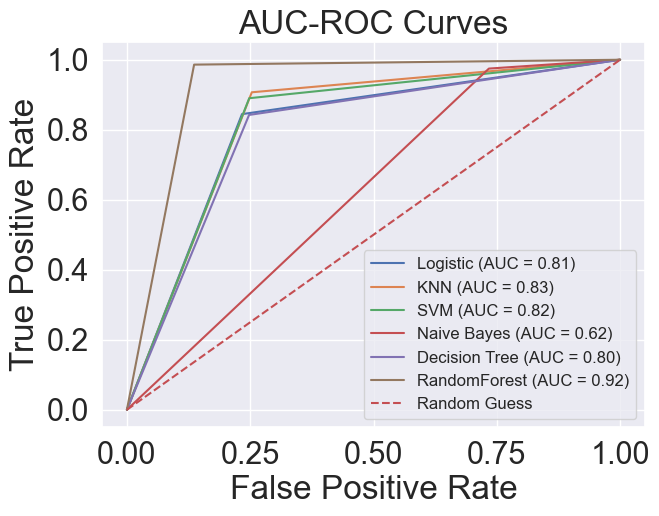

In [81]:
# Plot ROC curve for each model
from sklearn.metrics import roc_curve, auc
plt.figure(figsize=(7, 5))
 
for model in ['Logistic', 'KNN',  'SVM', 'Naive Bayes', 'Decision Tree', 'RandomForest']:
    fpr, tpr, _ = roc_curve(test_df['True'], test_df[model])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model} (AUC = {roc_auc:.2f})')
 
# Plot random guess line
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
 
# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC-ROC Curves')
plt.legend(fontsize=12)
plt.show()

## Model Anaylsis indicates that Random Forest Classifier Outperforms over other Model.

## Feature Importance

In [83]:
# Cheking for feature importance


from sklearn.ensemble import RandomForestClassifier
rd_clf_grids=RandomForestClassifier(random_state=77,max_depth=5,max_leaf_nodes=30,criterion='gini',n_estimators=50)
rd_clf_grids= RandomForestClassifier()
rd_clf_grids.fit(X_train_scaled, y_train)



feature_scores = pd.Series(rd_clf_grids.feature_importances_, index=X_train.columns).sort_values(ascending=True)
                   
print(feature_scores)


net_captial                          0.000000
profession_class_Never-worked        0.000034
profession_class_Without-pay         0.000058
occupation_Armed-Forces              0.000060
Vietnam                              0.000158
                                       ...   
hours_per_week                       0.055805
marital-status_Married-civ-spouse    0.096690
education_num                        0.107717
age                                  0.181645
final_census                         0.191235
Length: 62, dtype: float64


In [87]:
feature_scores[feature_scores<0.003].index
X_train1= X_train.drop(feature_scores[feature_scores<0.003].index, axis=1)
X_test1= X_test.drop(feature_scores[feature_scores<0.003].index, axis=1)

In [88]:
scaler=StandardScaler()
X_train_scaled1=scaler.fit_transform(X_train1)
X_test_scaled1=scaler.transform(X_test1)

In [89]:
lr1 = LogisticRegression()
lr1.fit(X_train_scaled1, y_train)

y_pred_lr1 = lr1.predict(X_test_scaled1)
y_pred_train_lr1 = lr1.predict(X_train_scaled1)

print(f"Accuracy Score of Logistic Regression is : {accuracy_score(y_test, y_pred_lr1)}")
print(f"Accuracy Score of Logistic Regression is : {accuracy_score(y_train, y_pred_train_lr1)}")
print(f"Confusion Matrix : \n{confusion_matrix(y_test, y_pred_lr1)}")
print(f"Classification Report : \n{classification_report(y_test, y_pred_lr1)}")

Accuracy Score of Logistic Regression is : 0.8040184453227931
Accuracy Score of Logistic Regression is : 0.8037140739520712
Confusion Matrix : 
[[2339  721]
 [ 469 2543]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.76      0.80      3060
           1       0.78      0.84      0.81      3012

    accuracy                           0.80      6072
   macro avg       0.81      0.80      0.80      6072
weighted avg       0.81      0.80      0.80      6072



In [90]:
from sklearn.ensemble import RandomForestClassifier
rd_clf_grids1=RandomForestClassifier(random_state=77,max_depth=5,max_leaf_nodes=30,criterion='gini',n_estimators=50)
rd_clf_grids1= RandomForestClassifier()
rd_clf_grids1.fit(X_train_scaled1, y_train)

y_pred_rd_clf1 = rd_clf_grids1.predict(X_test_scaled1)

y_pred_rd_train_clf1 = rd_clf_grids1.predict(X_train_scaled1)



print(f"Training Accuracy Score of Random Forest is : {accuracy_score(y_train, y_pred_rd_train_clf1)}")
print(f"Testing Accuracy Score of Random Forest is : {accuracy_score(y_test, y_pred_rd_clf1)}")
print(f"Confusion Matrix : {confusion_matrix(y_test, y_pred_rd_clf1)}")
print(f"Classification Report : {classification_report(y_test, y_pred_rd_clf1)}")

Training Accuracy Score of Random Forest is : 0.9999588240138352
Testing Accuracy Score of Random Forest is : 0.9272068511198946
Confusion Matrix : [[2659  401]
 [  41 2971]]
Classification Report :               precision    recall  f1-score   support

           0       0.98      0.87      0.92      3060
           1       0.88      0.99      0.93      3012

    accuracy                           0.93      6072
   macro avg       0.93      0.93      0.93      6072
weighted avg       0.93      0.93      0.93      6072



#### Sample of Predicted Results

In [93]:
new_series=pd.Series(y_pred_rd_clf1, index=y_test.index, name='Prediction')
pd.concat([y_test, new_series], axis=1).reset_index()

,index,income,Prediction
0,21377,1,1
1,16221,0,0
2,8341,0,0
3,14092,0,0
4,12135,0,0
...,...,...,...
6067,24560,1,1
6068,24083,1,1
6069,24943,1,1
6070,12923,0,0
